#### Parameter Interdependance

This code implements a broad grid search for each parameter (or combination if interdependant) seperately. Then, if necessary, we repeat the grid searh, narrowing in on the minimum error and run time combinations. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import time
from tqdm import tqdm

from GA_params_class.GeneticAlgorithm import GeneticAlgorithm
from function_module import *

In [2]:
cnn_model_path = '../../Models/CNN_6_1_2.keras'
masked_sequence = 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG'
target_expressions = [0, 0.5, 1]
precision = None
verbose = 0
test_cases = 10
lineages = 15

# To pass into the test function
kwargs = {
    'cnn_model_path': cnn_model_path,
    'masked_sequence': masked_sequence,
    'target_expressions': target_expressions,
    'precision': precision,
    'verbose': verbose,
    'lineages': lineages
}

# Parameters for full factorial design testing
# Does not include pop_size, islands, gene_flow_rate, num_competitors, or boltzmann_temperature. Selection does not include 'boltzmann' (see 1_sub_params.ipynb)

param_ranges = {
    'generations' : np.linspace(50, 500, test_cases, dtype=int),
    'base_mutation_rate' : np.linspace(0.1, 1, test_cases, dtype=float),
    'chromosomes' : np.linspace(1, 30, test_cases, dtype=int), # The masked region is 30 nucleotides long. When chromosomes=30, each nucleotide is a chromosome
    'elitist_rate' : np.linspace(0.1, 1, test_cases, dtype=float),
    'surval_rate' : np.linspace(0.1, 1, test_cases, dtype=float),
    'num_parents' : np.linspace(1, 10, test_cases, dtype=int),
    'selection' : ['tournament', 'tournament_pop', 'roulette', 'linear_scaling', 'rank_based', 'sus', 'truncation'],
}

Processing combinations:   0%|          | 0/30 [00:00<?, ?it/s]

Instructions for updating:
Use tf.identity with explicit device placement instead.


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 30/30 [53:27<00:00, 106.91s/it, Elapsed=3207.39s, ETA=106.91min] 


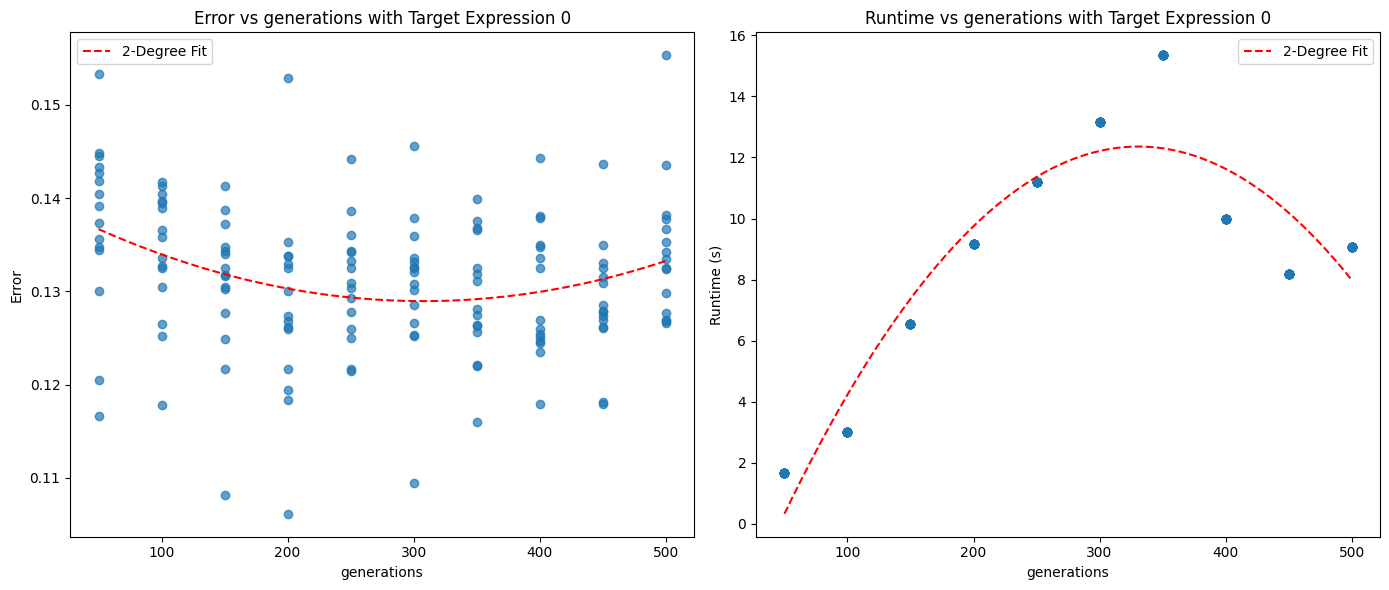

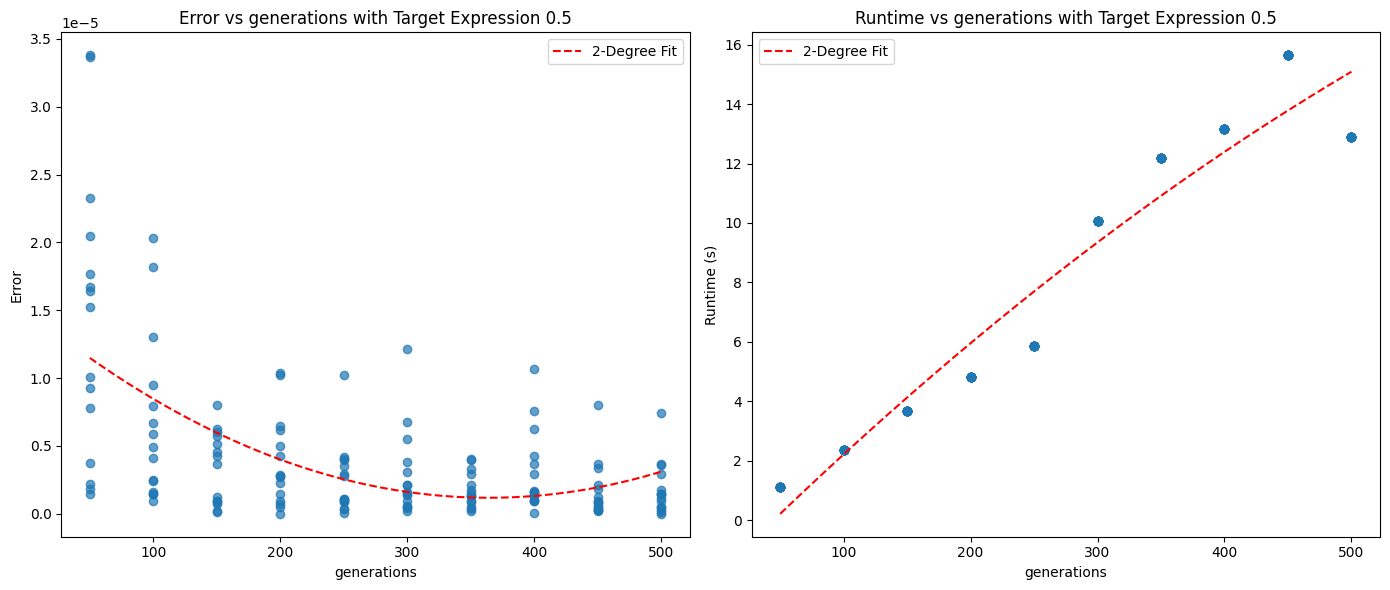

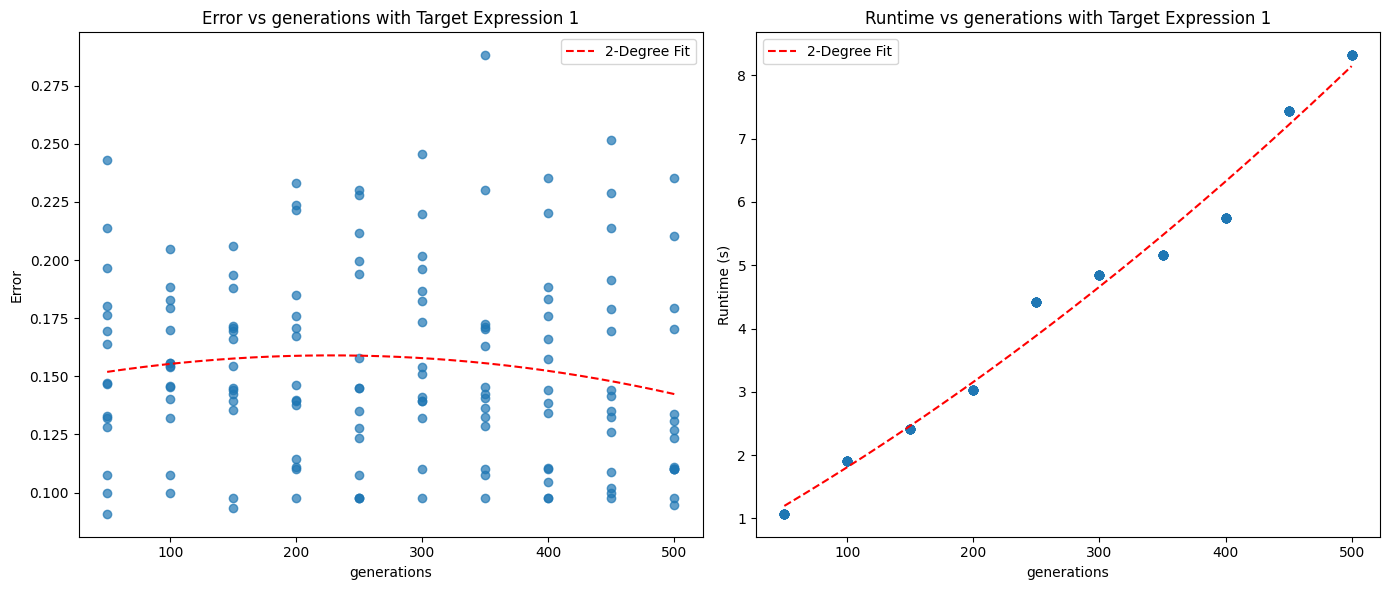

In [3]:
# Find optimal generations

results_df = test_params(param_ranges['generations'], 'generations', **kwargs)
for target_expression in target_expressions:
    filter_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filter_df, target_expression, 'generations', polynomial_degree=2)

Processing combinations: 100%|██████████| 30/30 [26:27<00:00, 52.91s/it, Elapsed=1587.32s, ETA=52.91min] 


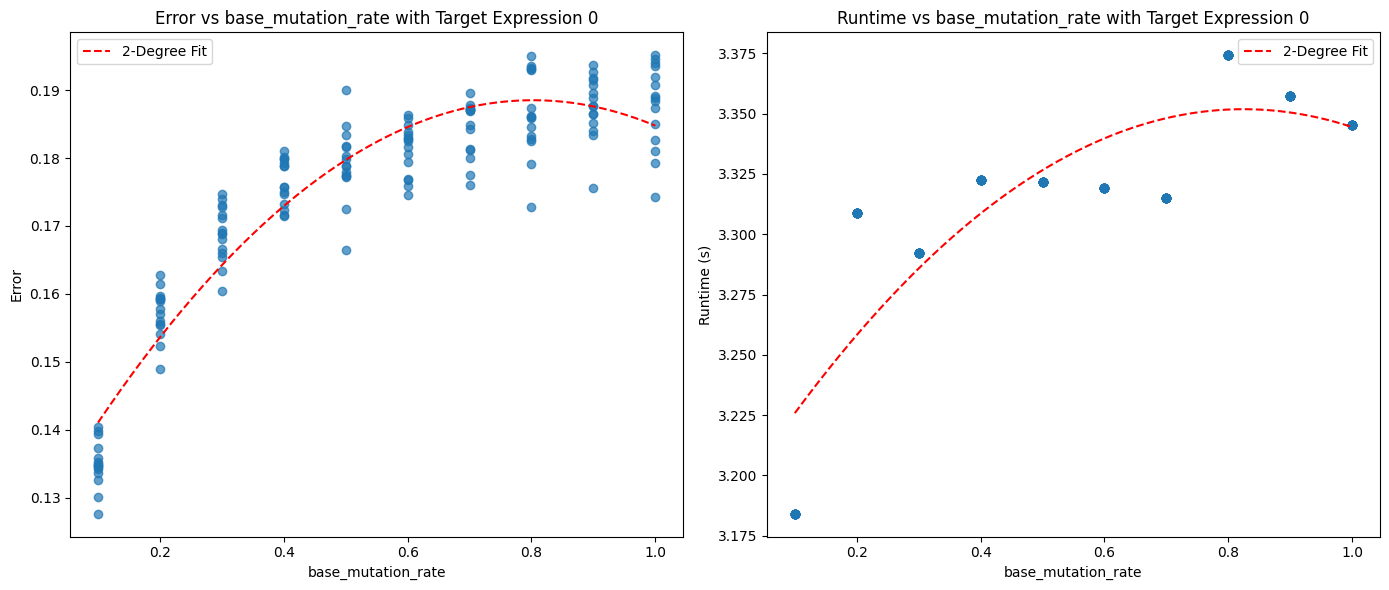

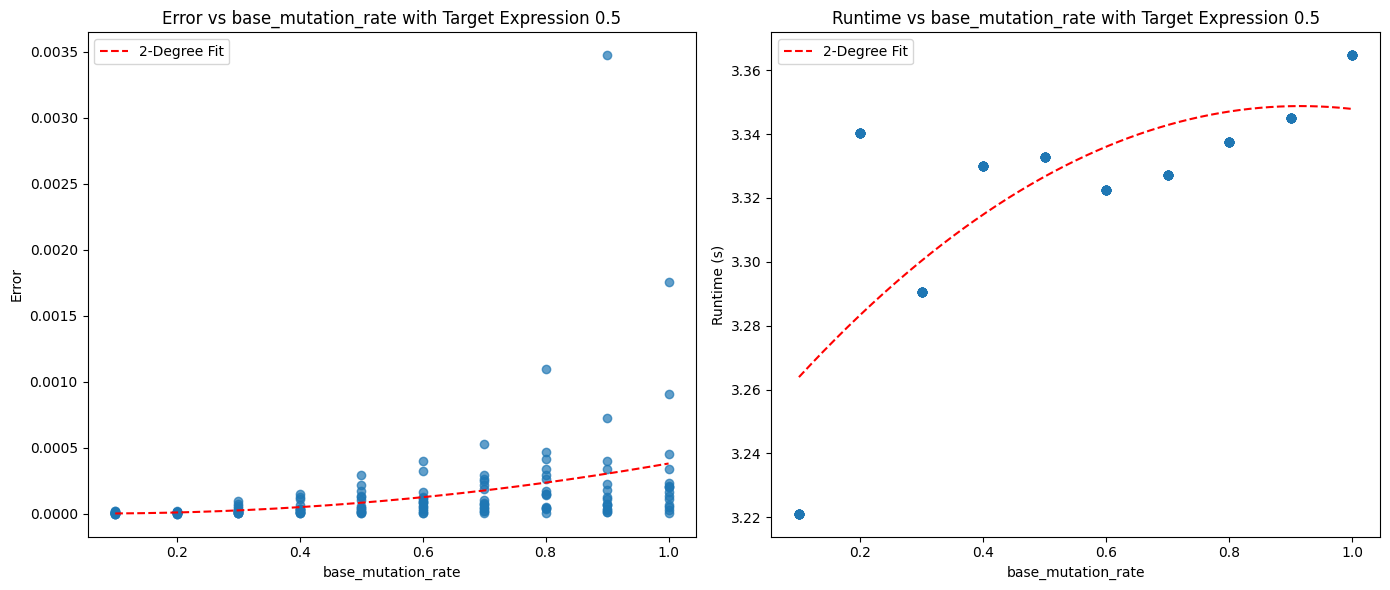

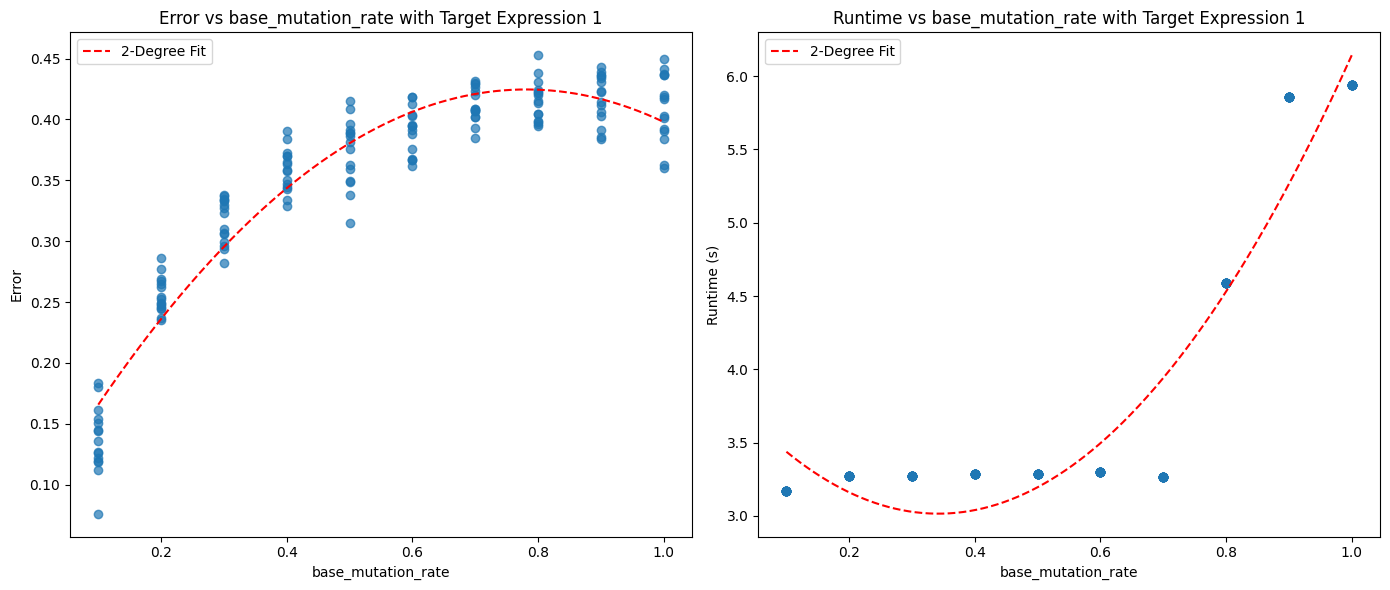

In [4]:
# Find optimal base_mutation_rate

results_df = test_params(param_ranges['base_mutation_rate'], 'base_mutation_rate', **kwargs)
for target_expression in target_expressions:
    filter_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filter_df, target_expression, 'base_mutation_rate', polynomial_degree=2)

Processing combinations:   0%|          | 0/30 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 30/30 [23:34<00:00, 47.14s/it, Elapsed=1414.17s, ETA=47.14min] 


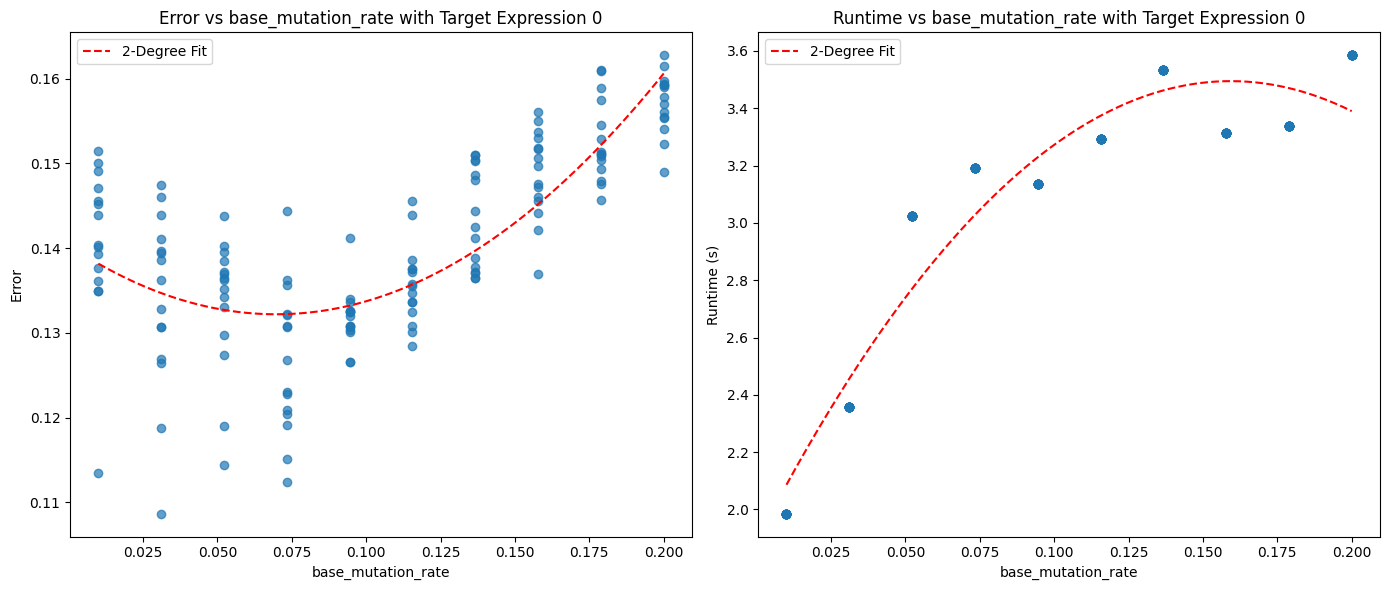

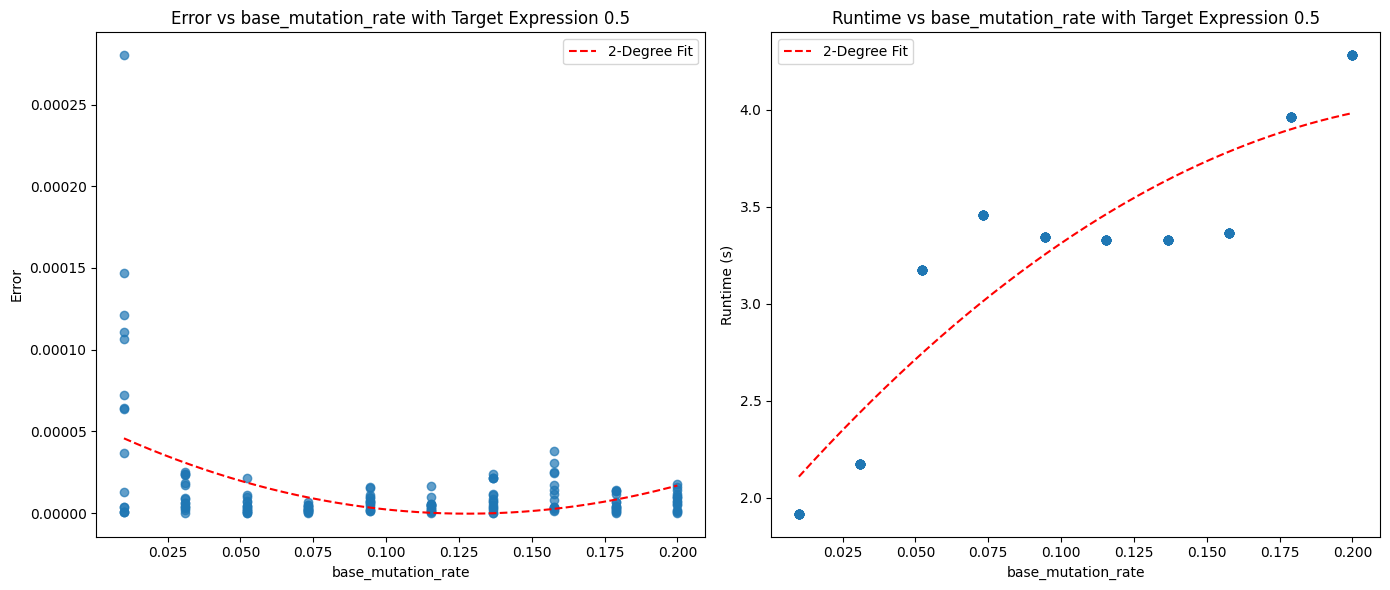

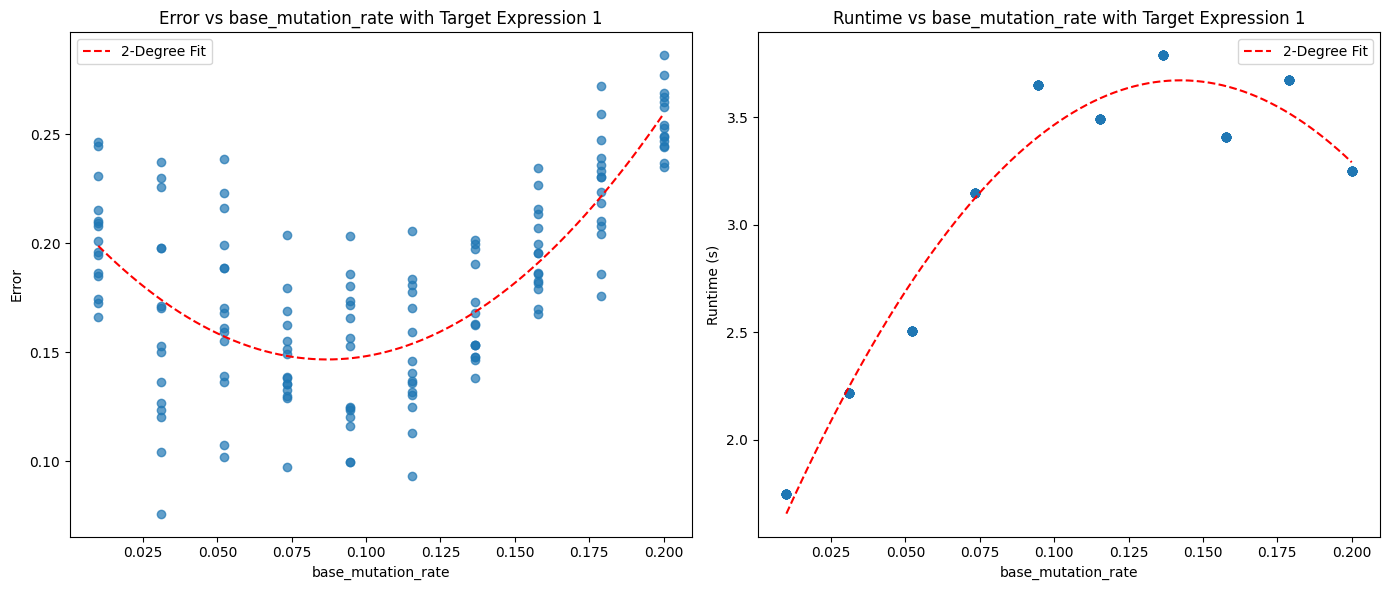

In [11]:
# Find optimal base_mutation_rate with smaller test range

param_ranges['base_mutation_rate'] = np.linspace(0.01, 0.2, test_cases, dtype=float)

results_df = test_params(param_ranges['base_mutation_rate'], 'base_mutation_rate', **kwargs, iteration=2)
for target_expression in target_expressions:
    filter_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filter_df, target_expression, 'base_mutation_rate', polynomial_degree=2)

Processing combinations: 100%|██████████| 30/30 [37:12<00:00, 74.43s/it, Elapsed=2232.93s, ETA=74.43min] 


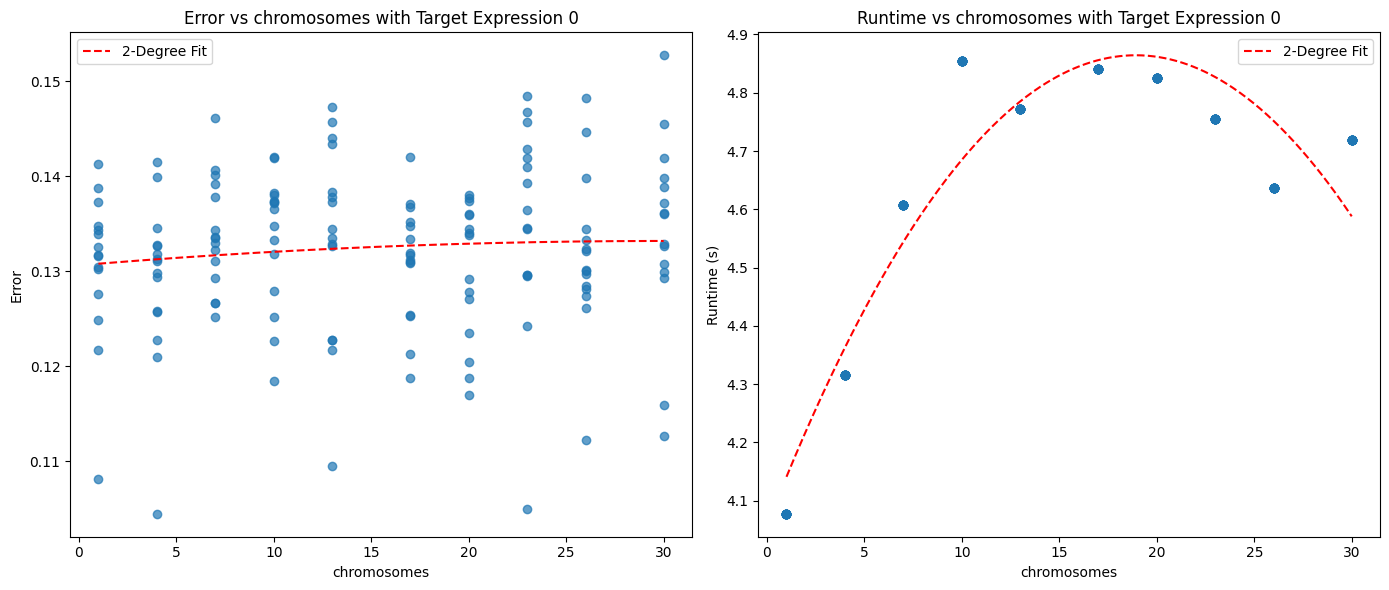

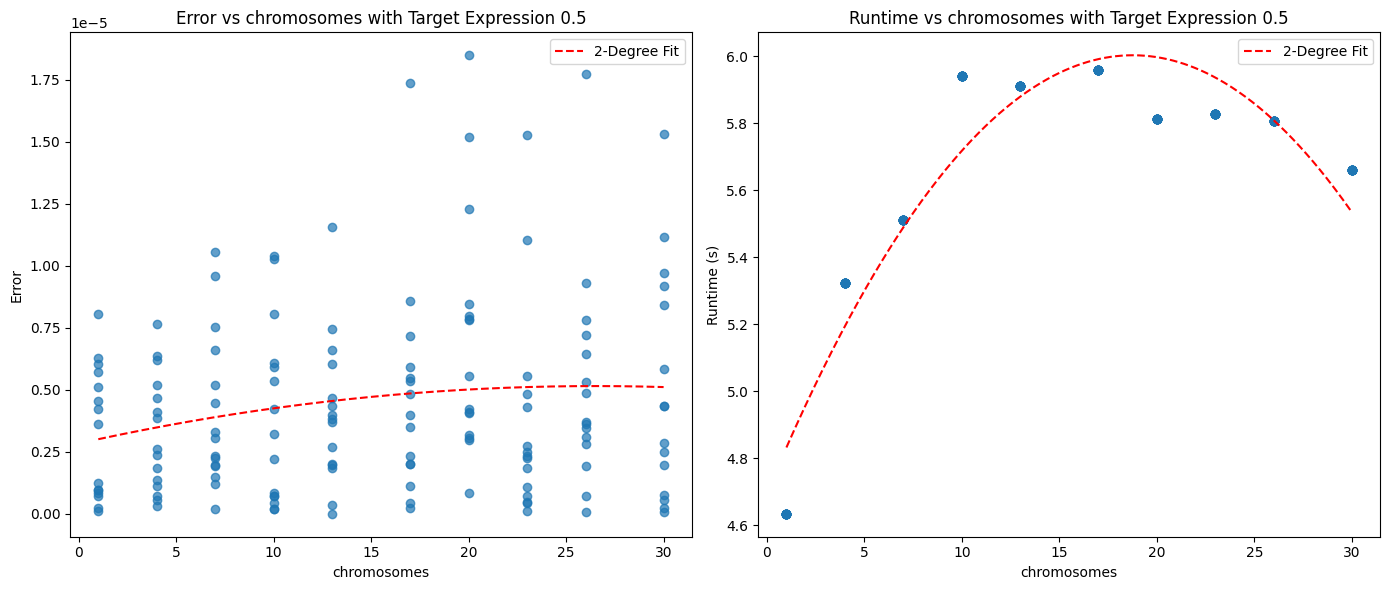

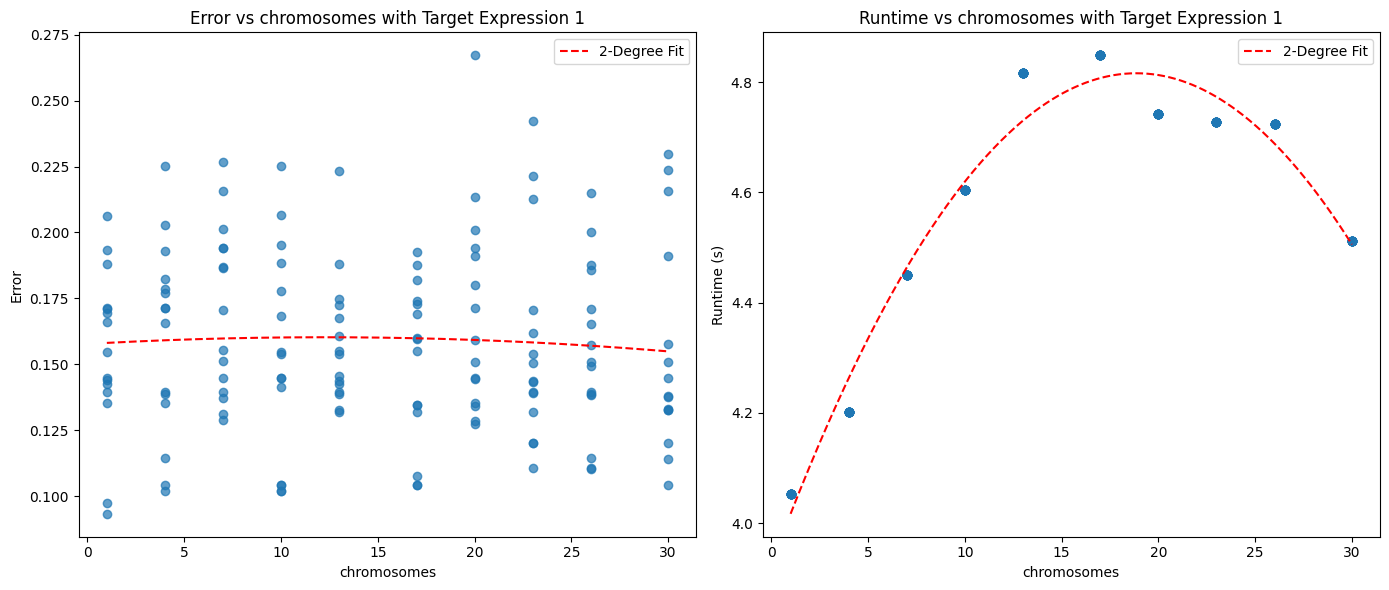

In [6]:
# Find optimal chromosomes

results_df = test_params(param_ranges['chromosomes'], 'chromosomes', **kwargs)
for target_expression in target_expressions:
    filter_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filter_df, target_expression, 'chromosomes', polynomial_degree=2)

Processing combinations: 100%|██████████| 30/30 [32:45<00:00, 65.51s/it, Elapsed=1965.20s, ETA=65.51min] 


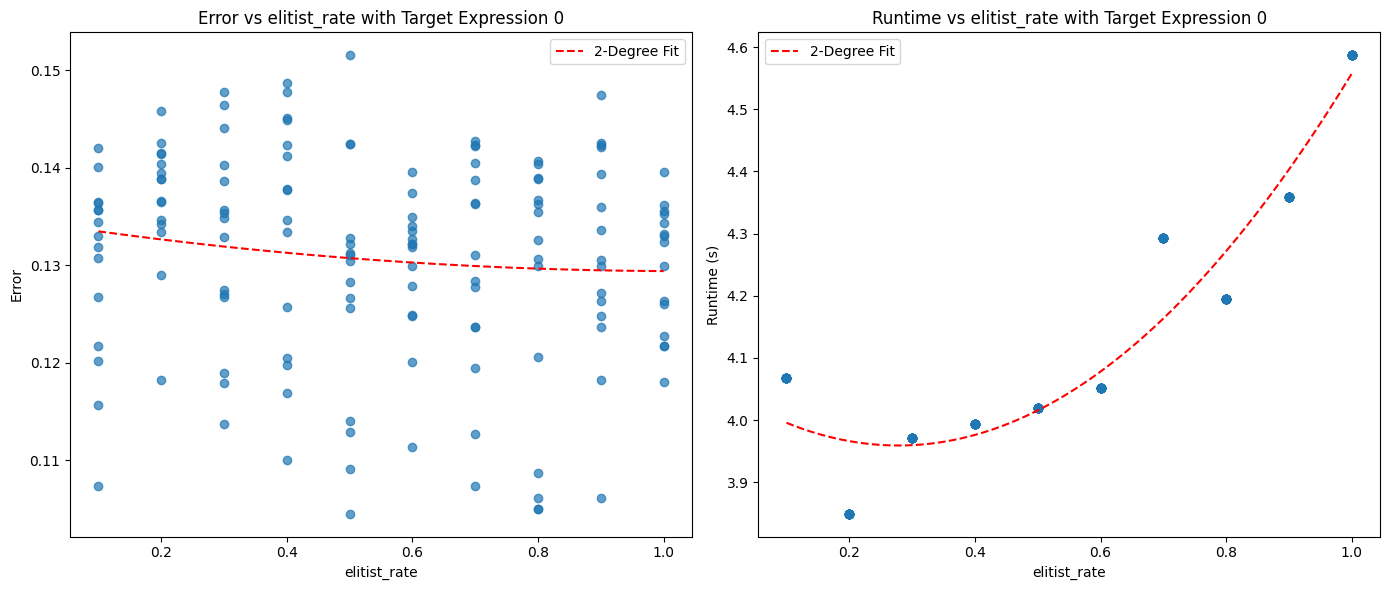

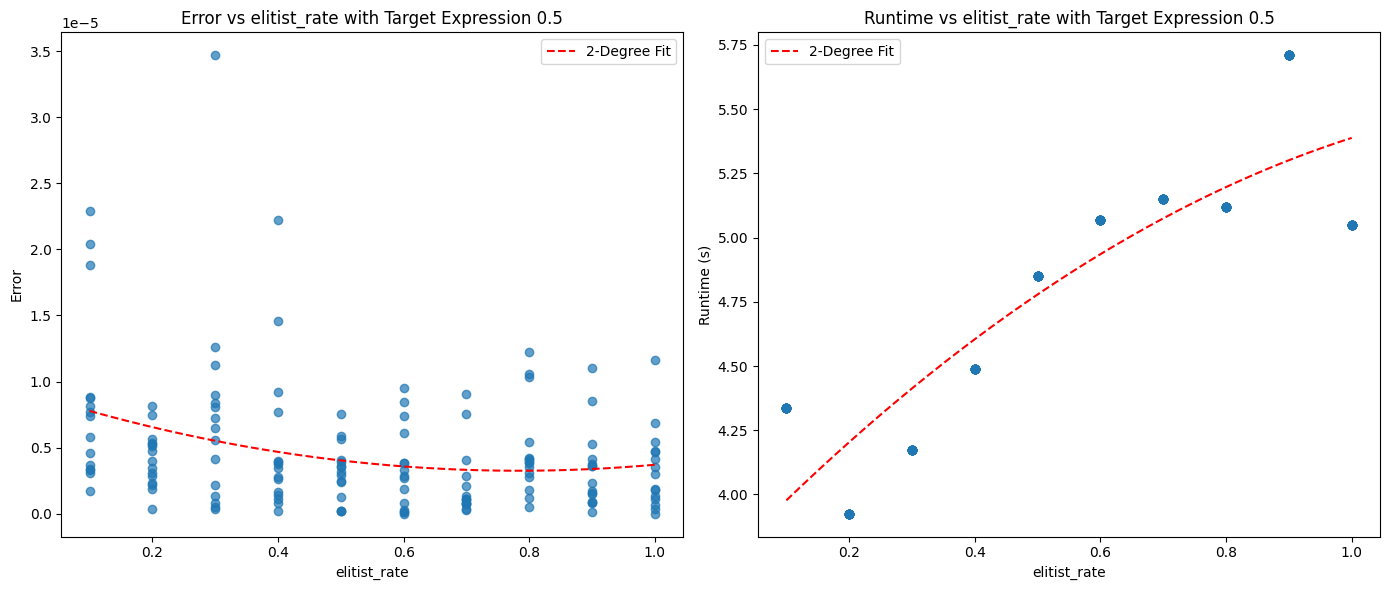

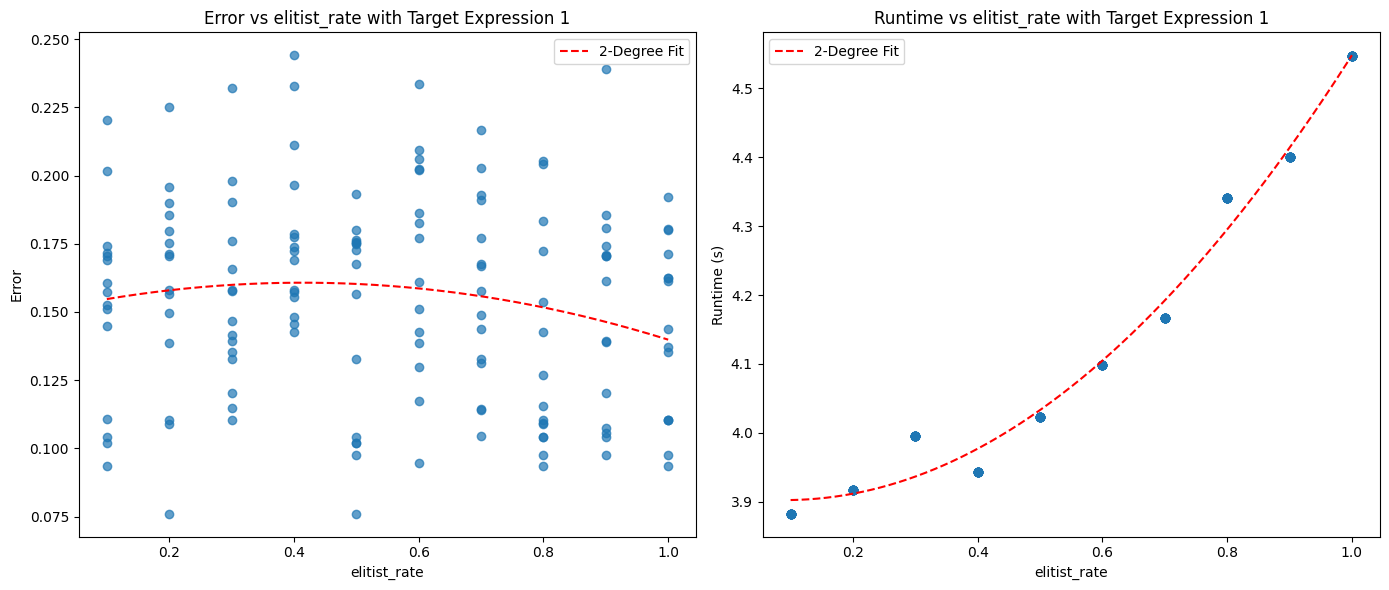

In [7]:
# Find optimal elitist_rate

results_df = test_params(param_ranges['elitist_rate'], 'elitist_rate', **kwargs)
for target_expression in target_expressions:
    filter_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filter_df, target_expression, 'elitist_rate', polynomial_degree=2)

Processing combinations: 100%|██████████| 30/30 [20:11<00:00, 40.39s/it, Elapsed=1211.81s, ETA=40.39min]


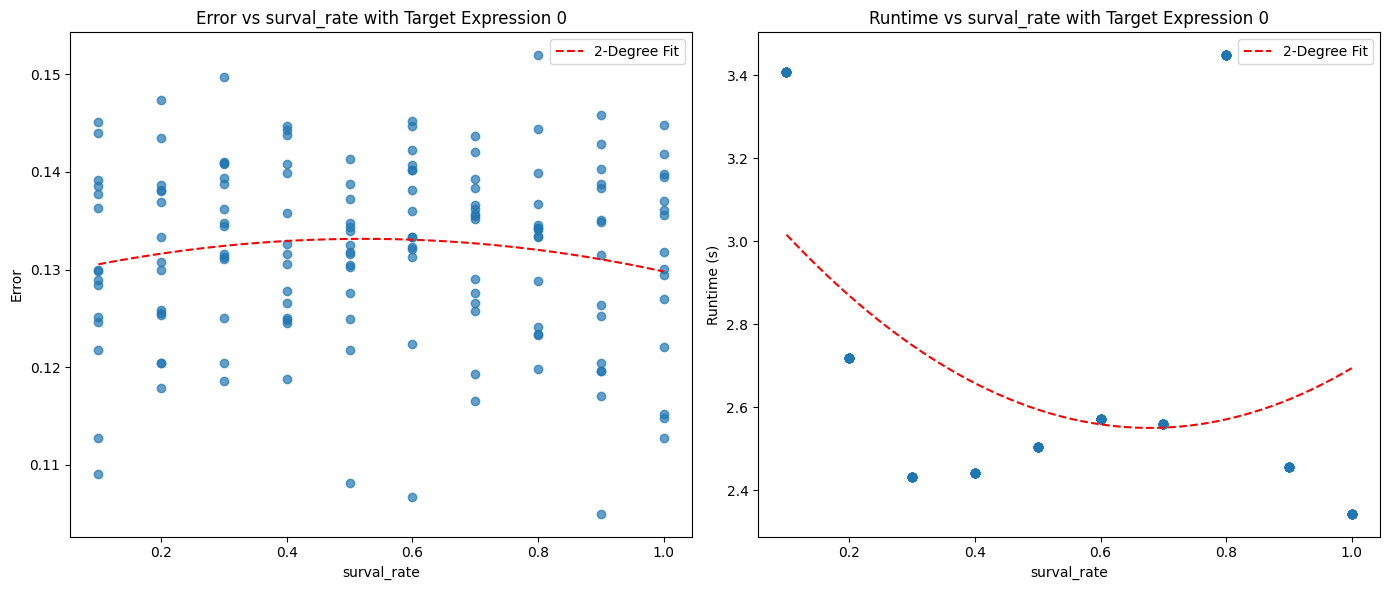

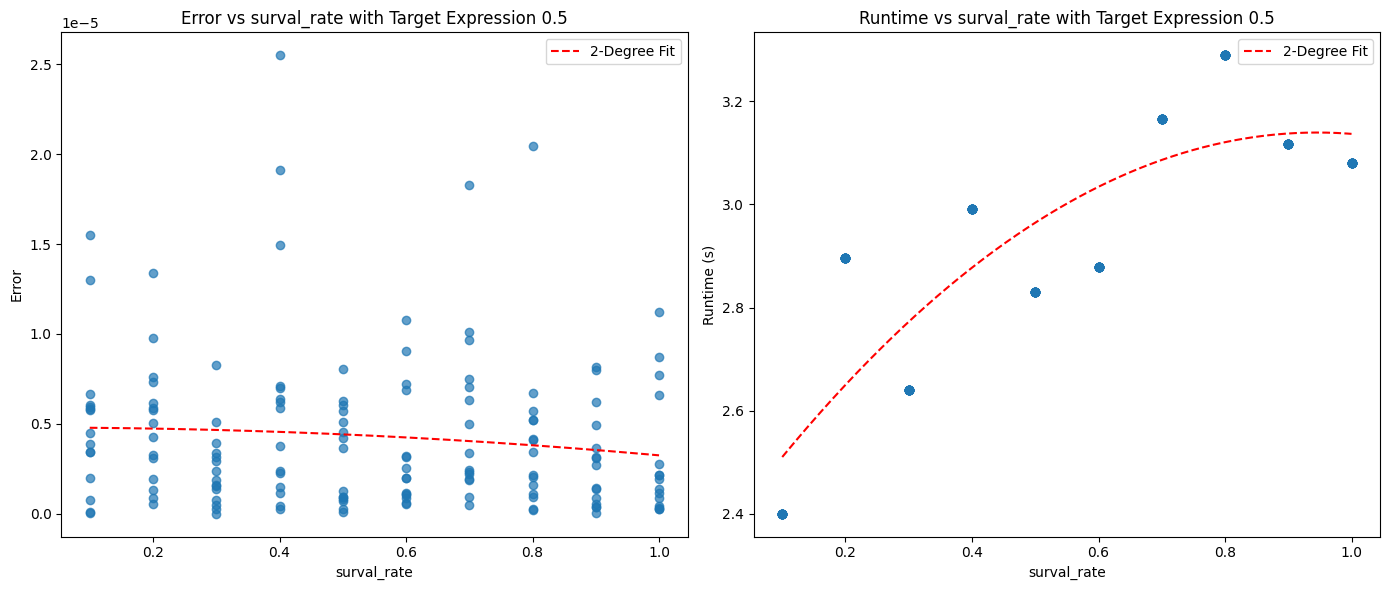

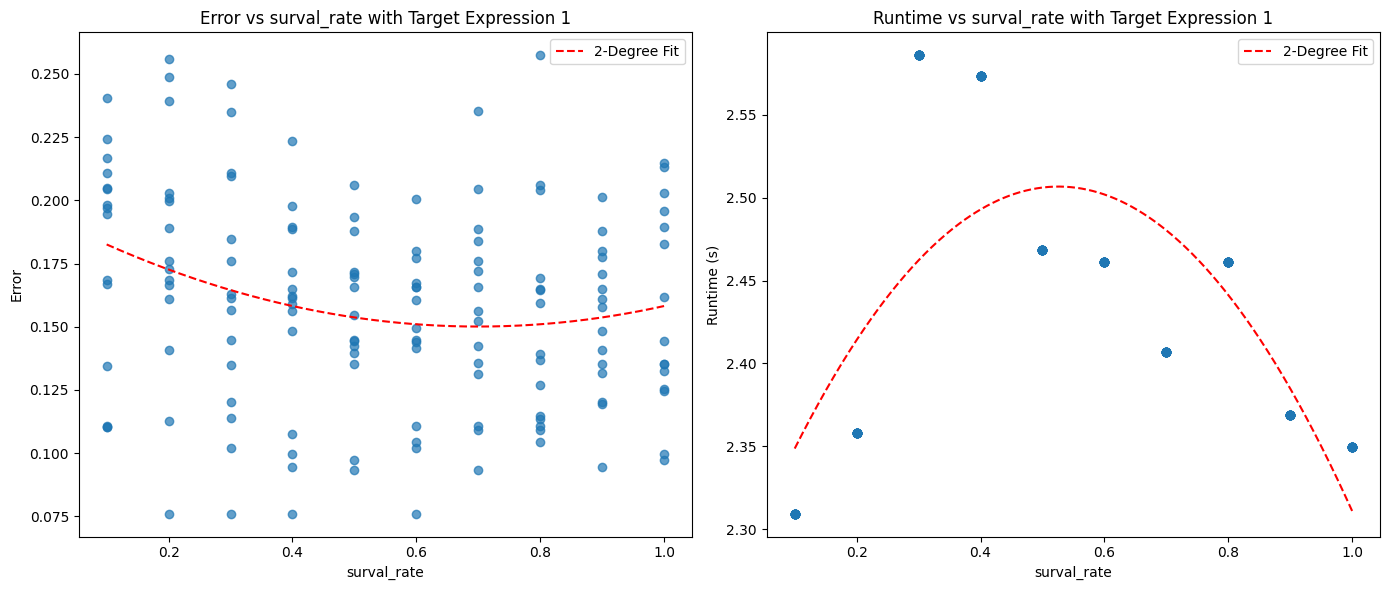

In [8]:
# Find optimal surval_rate

results_df = test_params(param_ranges['surval_rate'], 'surval_rate', **kwargs)
for target_expression in target_expressions:
    filter_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filter_df, target_expression, 'surval_rate', polynomial_degree=2)

Processing combinations: 100%|██████████| 30/30 [19:53<00:00, 39.78s/it, Elapsed=1193.27s, ETA=39.78min]


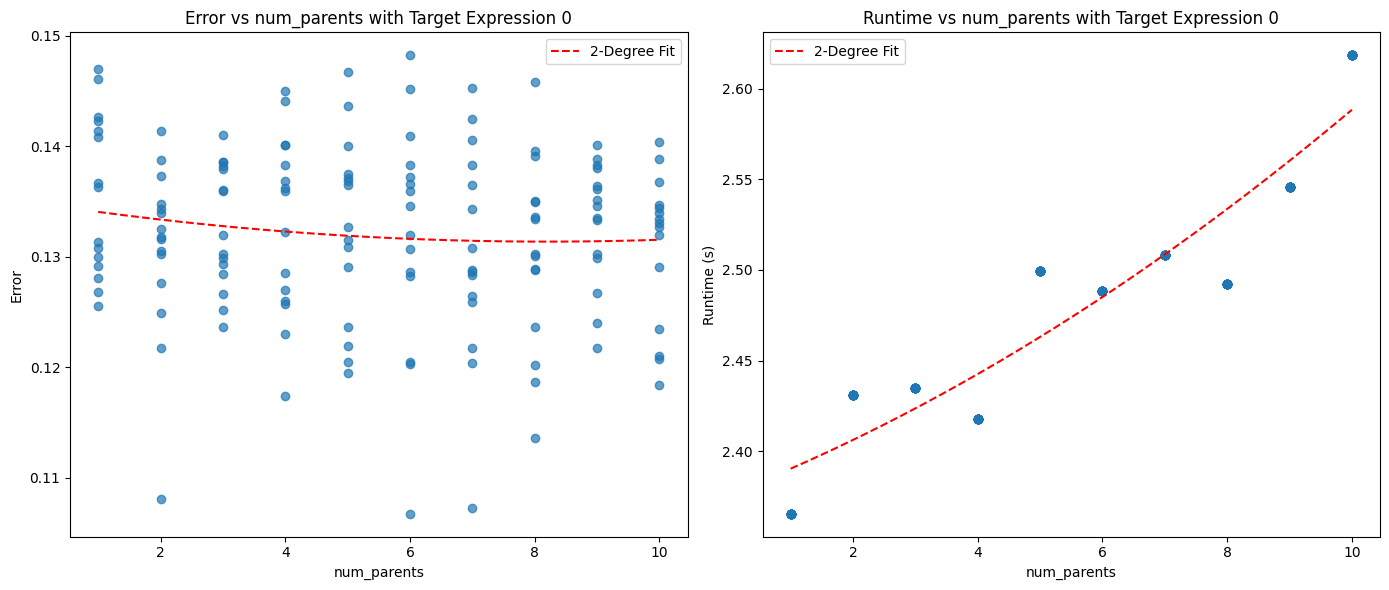

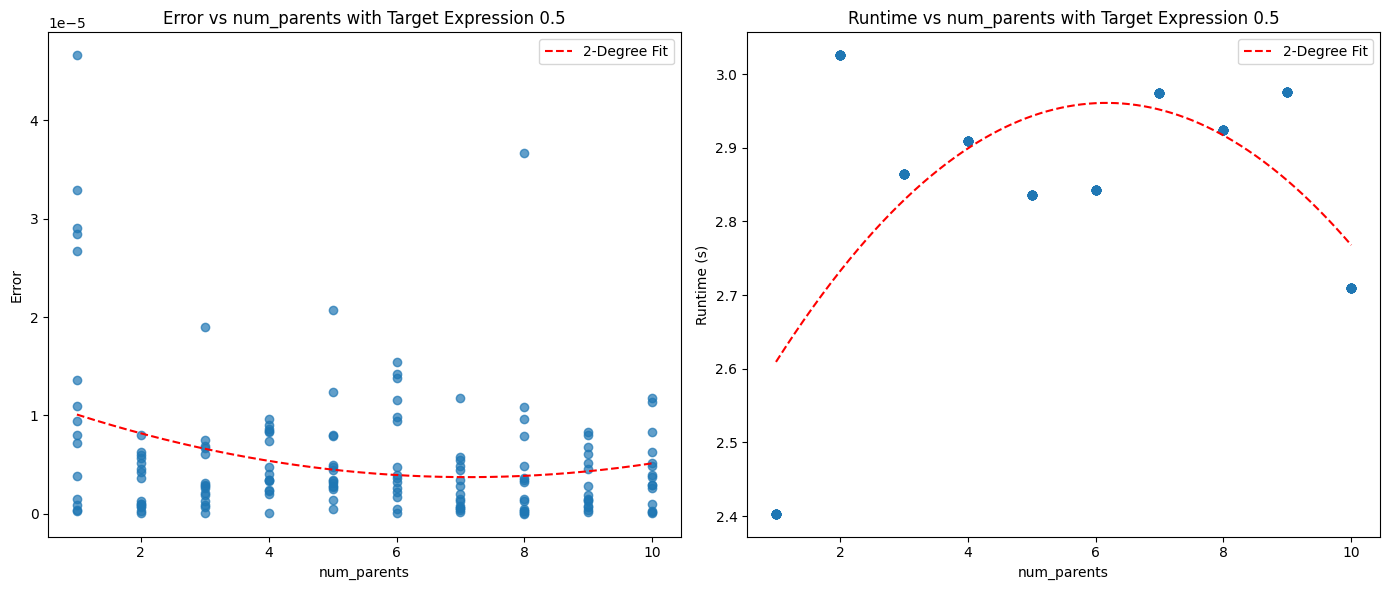

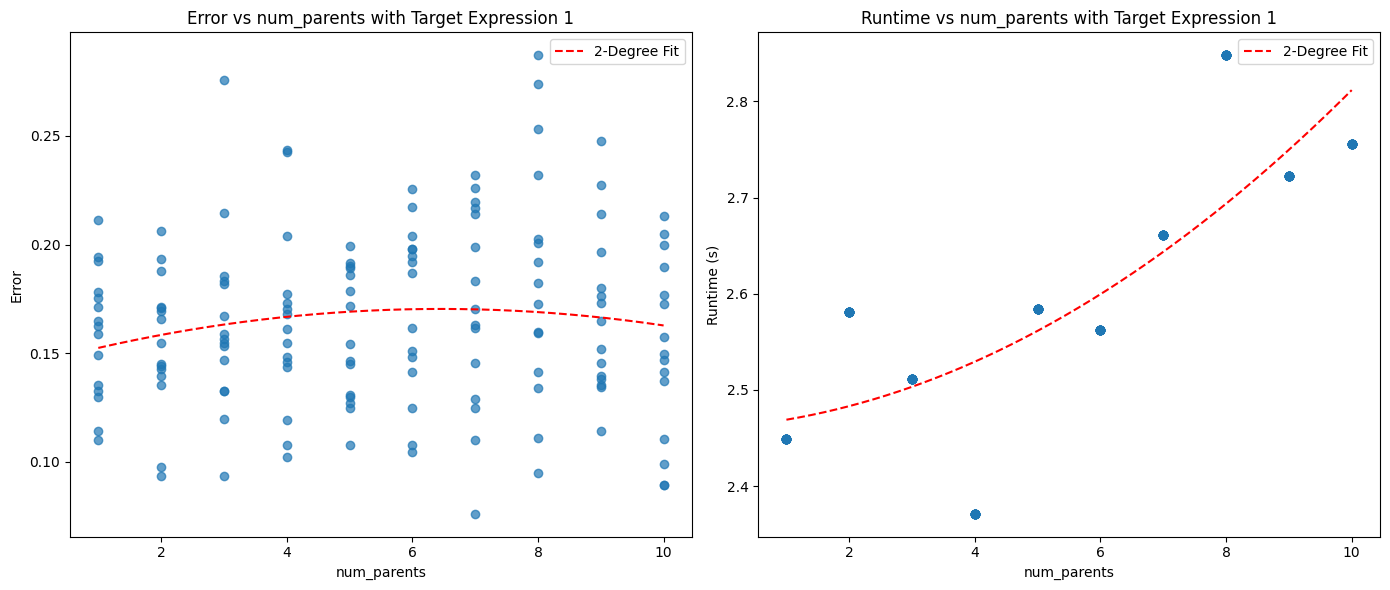

In [9]:
# Find optimal num_parents

results_df = test_params(param_ranges['num_parents'], 'num_parents', **kwargs)
for target_expression in target_expressions:
    filter_df = results_df[results_df['target_expression'] == target_expression]
    scatter_plot(filter_df, target_expression, 'num_parents', polynomial_degree=2)

Processing combinations: 100%|██████████| 21/21 [16:34<00:00, 47.35s/it, Elapsed=994.35s, ETA=33.14min] 


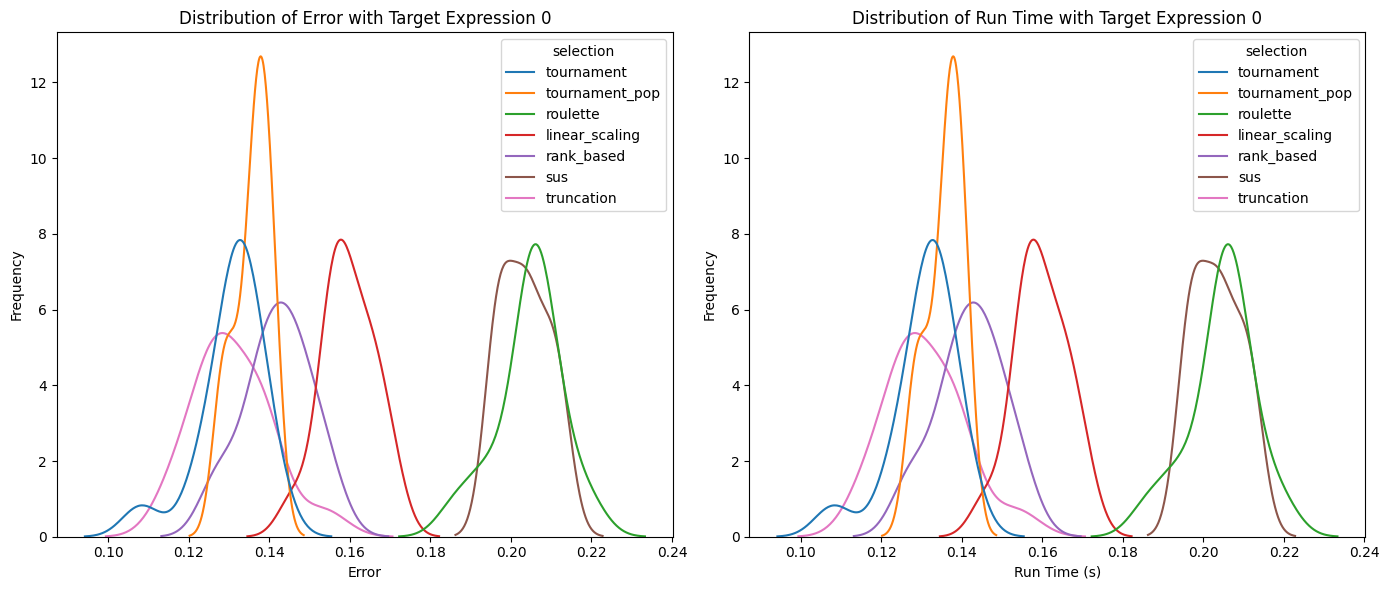

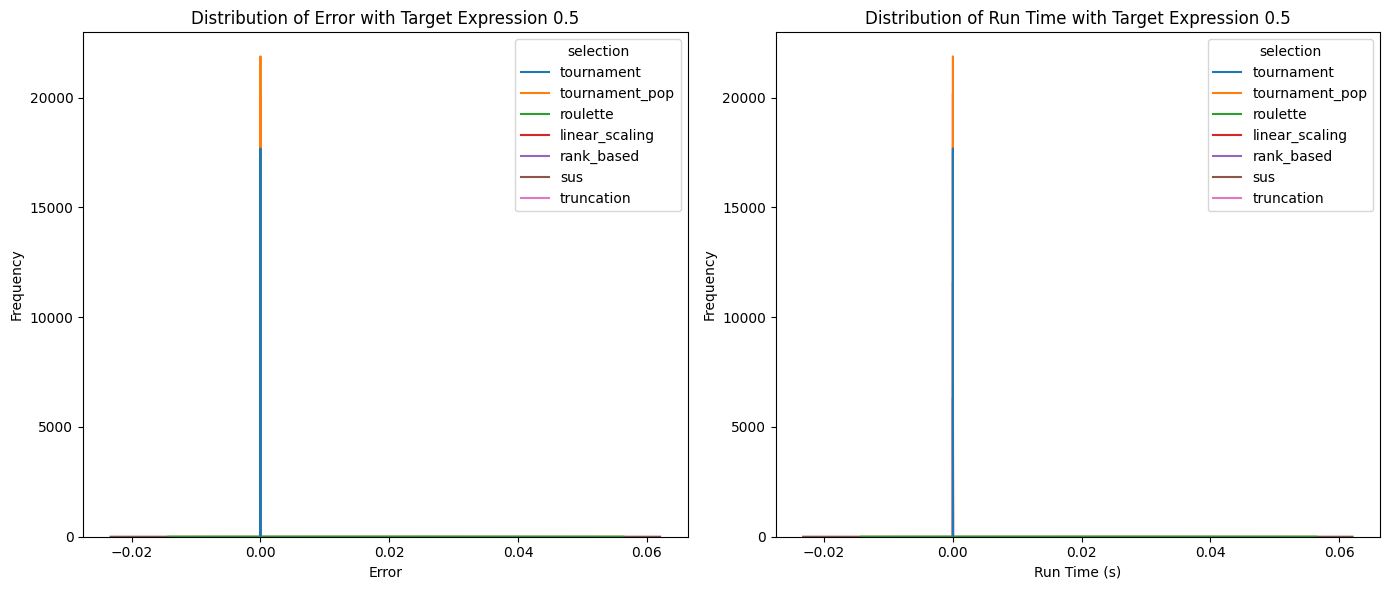

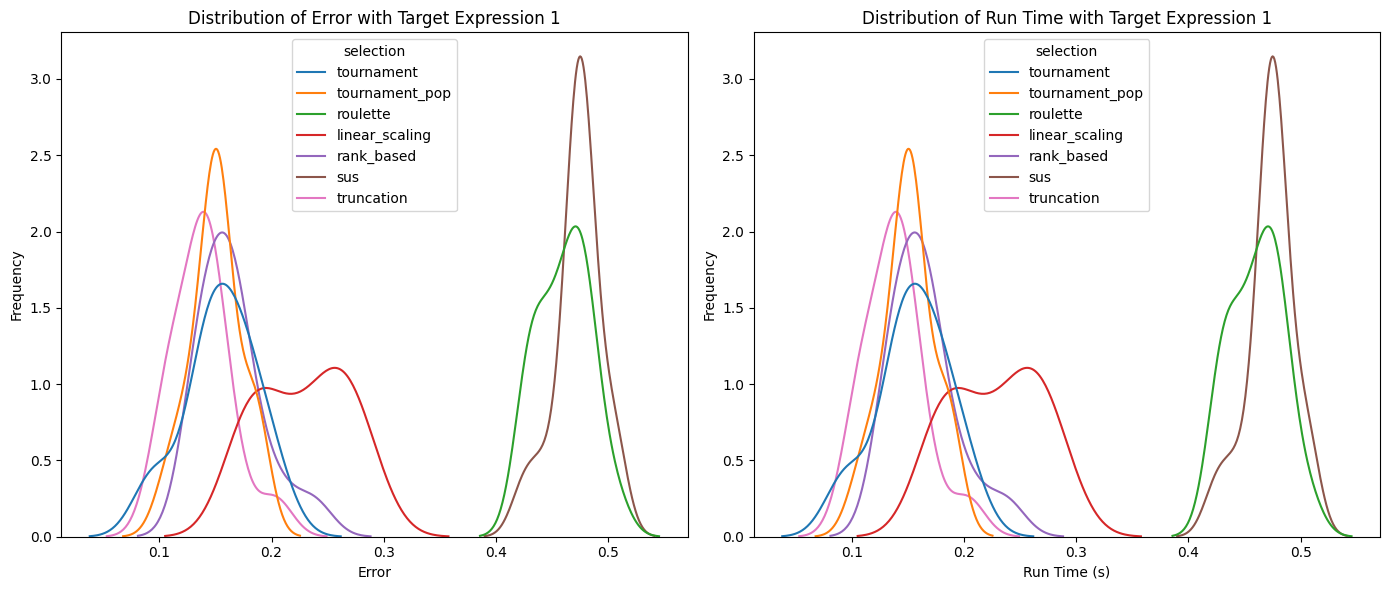

In [10]:
# Find optimal selection

results_df = test_params(param_ranges['selection'], 'selection', **kwargs)
for target_expression in target_expressions:
    filter_df = results_df[results_df['target_expression'] == target_expression]
    distribution_plot(filter_df, target_expression, 'selection')